In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.signal import butter, lfilter

In [117]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def data_fft(data,Fs=26):
    Fs = 26;  # sampling rate
    Ts = 1.0/Fs; # sampling interval
    n = len(data) # length of the signal
    k = np.arange(n)
    T = round(n/Fs)
    frq = k/T # two sides frequency range
    frq = frq[range(round(n/2))] # one side frequency range
    t = np.arange(0,n*Ts,Ts)
    Y = np.fft.fft(data)/n # fft computing and normalization
    Y = Y[range(round(n/2))]
    return frq, abs(Y)

def data_process(data,lowcut=3, highcut=8, fs=26,order=5):
    data = butter_bandpass_filter(data, lowcut, highcut, fs, order)
    x, y = data_fft(data,fs)
    return x, y
    

## Import the data

In [118]:
kitti_data = pd.read_csv("/home/brenda/Hackathon/kitti.csv")
kitti_data=kitti_data.drop('Unnamed: 0', 1)
lars_data = pd.read_csv("/home/brenda/Hackathon/lars.csv")
lars_data=lars_data.drop('Unnamed: 0', 1)
lars_data_tapping = pd.read_csv("/home/brenda/Hackathon/lars_tapping.csv")
lars_data_tapping=lars_data_tapping.drop('Unnamed: 0', 1)

In [119]:
kitti_data.columns=['acc_X','acc_Y','acc_Z','gyro_X','gyro_Y','gyro_Z','heading']
lars_data.columns=['acc_X','acc_Y','acc_Z','gyro_X','gyro_Y','gyro_Z','heading']

In [120]:
lars_data_tapping.head()

,time,acc_X,acc_Y,acc_Z,gyro_X,gyro_Y,gyro_Z,compass_1,compass_2,compass_3
0,1490.0,-0.05,0.02,-1.01,-0.30,-1.77,0.06,-7.65,80.42,-21.46
1,1573.0,-0.05,0.01,-0.98,-0.43,-1.52,-0.73,-9.30,79.22,-19.20
2,1582.0,-0.06,0.03,-1.06,-1.34,-4.02,-0.49,-8.55,79.52,-19.95
3,1591.0,-0.05,0.00,-0.96,0.00,3.11,-0.55,-8.70,80.42,-20.41
4,1600.0,-0.07,0.02,-1.03,-0.55,-3.72,-0.30,-8.40,81.62,-20.86


In [121]:
kitti_gyro_X = kitti_data['gyro_X'].values
kitti_gyro_Y = kitti_data['gyro_Y'].values
kitti_gyro_Z = kitti_data['gyro_Z'].values

In [137]:
kitti_acc_X = kitti_data['acc_X'].values
kitti_acc_Y = kitti_data['acc_Y'].values
kitti_acc_Z = kitti_data['acc_Z'].values

In [148]:
lars_gyro_X = lars_data['gyro_X'].values
lars_gyro_Y = lars_data['gyro_Y'].values
lars_gyro_Z = lars_data['gyro_Z'].values

lars_acc_X = lars_data['acc_X'].values
lars_acc_Y = lars_data['acc_Y'].values
lars_acc_Z = lars_data['acc_Z'].values

In [123]:
lars_tapping_gyro_X = lars_data_tapping['gyro_X'].values
lars_tapping_gyro_Y = lars_data_tapping['gyro_Y'].values
lars_tapping_gyro_Z = lars_data_tapping['gyro_Z'].values

In [124]:
lars_tapping_acc_X = lars_data_tapping['acc_X'].values
lars_tapping_acc_Y = lars_data_tapping['acc_Y'].values
lars_tapping_acc_Z = lars_data_tapping['acc_Z'].values

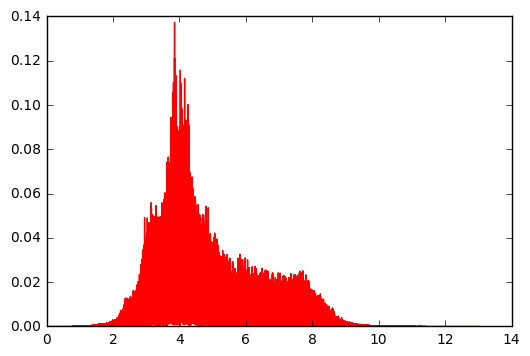

In [26]:
x, y =data_fft(lars_gyro_X_bandpass)
plt.plot(x,y,'red')
plt.show()

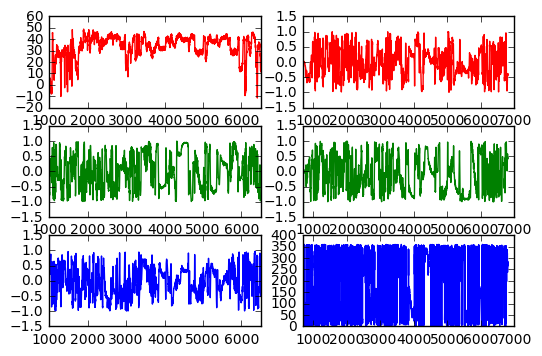

In [125]:
x, y = data_process(lars_gyro_Z)
plt.plot(x,y,'red')
plt.show()

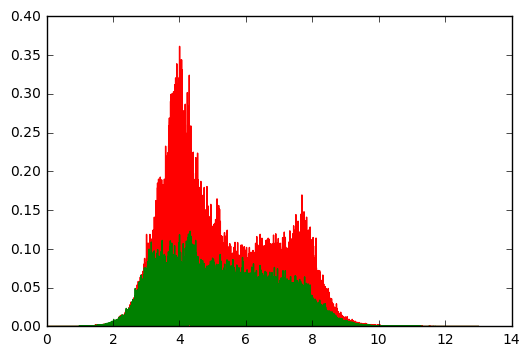

In [126]:
x1, y1 = data_process(lars_gyro_Y)
x2, y2 = data_process(kitti_gyro_Y)
plt.plot(x1,y1,'red')
plt.plot(x2,y2,'green')
plt.show()

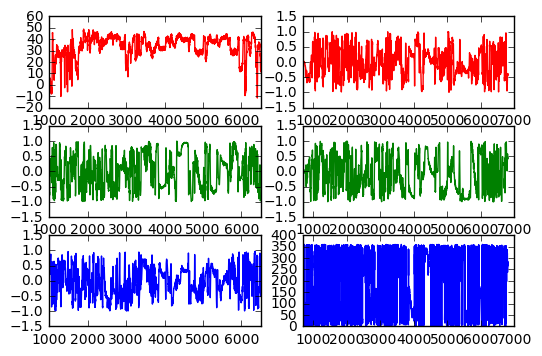

In [115]:
f, ((aX, gX),(aY,gY),(aZ, gZ)) = plt.subplots(3,2)
aX.plot(lars_tapping_acc_X,'r')
aY.plot(lars_tapping_acc_Y,'g')
aZ.plot(lars_tapping_acc_Z,'b')

aX.set_xlim(1000,6500)
aX.set_ylim(-20,60)

aY.set_xlim(1000,6500)
aY.set_ylim(-1.5,1.5)

aZ.set_xlim(1000,6500)
aZ.set_ylim(-1.5,1.5)

gX.plot(lars_tapping_gyro_X,'r')
gX.set_ylim(-1.5,1.5)
gX.set_xlim(700,7000)
gY.plot(lars_tapping_gyro_Y,'g')
gY.set_xlim(700,7000)
gY.set_ylim(-1.5,1.5)
gZ.plot(lars_tapping_gyro_Z,'b')
gZ.set_xlim(700,7000)
gZ.set_ylim(0,400)

f

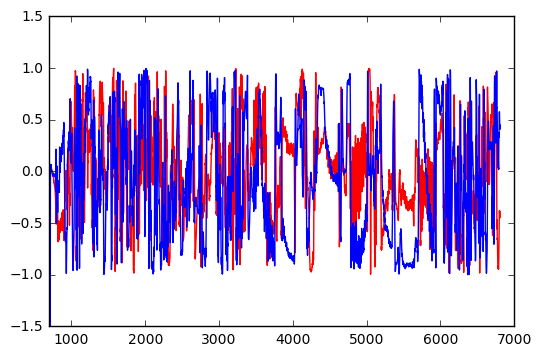

In [88]:
plt.plot(lars_tapping_gyro_X,'r')
plt.plot(lars_tapping_gyro_Y,'b')
#plt.plot(lars_tapping_gyro_Z,'g')
plt.xlim(700,7000)
plt.ylim(-1.5,1.5)
plt.show()

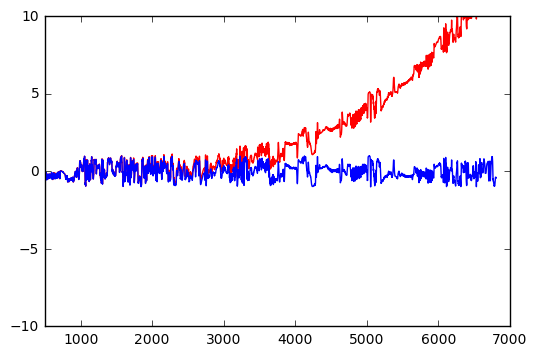

In [85]:
plt.plot(butter_bandpass_filter(lars_tapping_gyro_X,0,12,26),'r')
plt.plot(lars_tapping_gyro_X,'b')
plt.xlim(500,7000)
plt.ylim(-10,10)
plt.show()

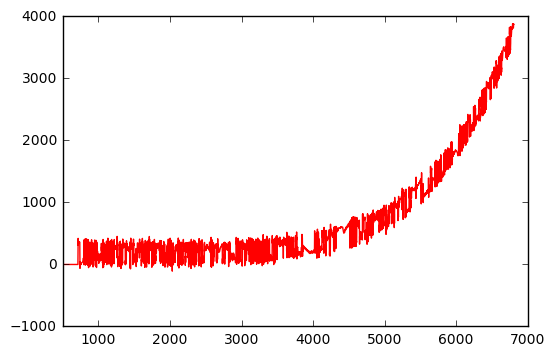

In [75]:
plt.plot(butter_bandpass_filter(lars_tapping_gyro_Z,0,10,26),'r')
plt.xlim(500,7000)
plt.show()

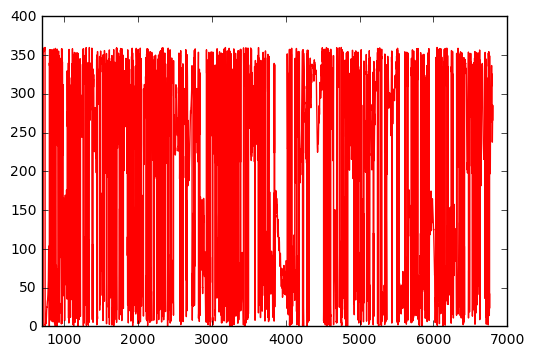

In [96]:
plt.plot(lars_tapping_gyro_Z,'r')
plt.xlim(700,7000)
plt.ylim(0,400)
plt.show()

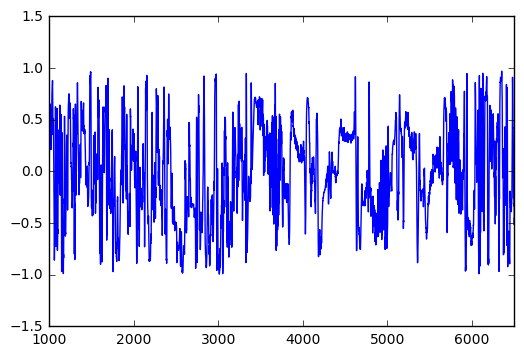

In [114]:
plt.plot(lars_tapping_acc_Z)
plt.xlim(1000,6500)
plt.ylim(-1.5,1.5)
plt.show()

In [128]:
data_process(kitti_gyro_X)

(array([  0.00000000e+00,   3.38753388e-05,   6.77506775e-05, ...,
          1.29998306e+01,   1.29998645e+01,   1.29998984e+01]),
 array([  1.65879895e-06,   1.65879895e-06,   1.65879896e-06, ...,
          1.54288420e-05,   1.54288420e-05,   1.54288420e-05]))

In [145]:
kitti_processes = pd.DataFrame({'acc_X': data_process(kitti_acc_X)[1],'acc_Y': data_process(kitti_acc_Y)[1],'acc_Z': data_process(kitti_acc_Z)[1], 'gyro_X': data_process(kitti_gyro_X)[1], 'gyro_Y': data_process(kitti_gyro_Y)[1], 'gyro_Z': data_process(kitti_gyro_Z)[1] })

In [149]:
lars_processed = pd.DataFrame({'acc_X': data_process(lars_acc_X)[1],'acc_Y': data_process(lars_acc_Y)[1],'acc_Z': data_process(lars_acc_Z)[1], 'gyro_X': data_process(lars_gyro_X)[1], 'gyro_Y': data_process(lars_gyro_Y)[1], 'gyro_Z': data_process(lars_gyro_Z)[1] })

In [151]:
lars_processed.head()

,acc_X,acc_Y,acc_Z,gyro_X,gyro_Y,gyro_Z
0,8.298073e-10,1.916770e-09,5.959626e-09,9.065886e-08,1.538033e-07,2.520104e-07
1,8.298073e-10,1.916770e-09,5.959626e-09,9.065886e-08,1.538033e-07,2.520104e-07
2,8.298073e-10,1.916770e-09,5.959626e-09,9.065886e-08,1.538033e-07,2.520104e-07
3,8.298073e-10,1.916770e-09,5.959626e-09,9.065886e-08,1.538033e-07,2.520104e-07
4,8.298074e-10,1.916770e-09,5.959626e-09,9.065886e-08,1.538033e-07,2.520104e-07


In [152]:
kitti_processes.head()

,acc_X,acc_Y,acc_Z,gyro_X,gyro_Y,gyro_Z
0,3.437333e-08,3.345136e-08,5.516138e-08,0.000002,0.000002,0.000004
1,3.437333e-08,3.345136e-08,5.516138e-08,0.000002,0.000002,0.000004
2,3.437333e-08,3.345136e-08,5.516138e-08,0.000002,0.000002,0.000004
3,3.437333e-08,3.345136e-08,5.516138e-08,0.000002,0.000002,0.000004
4,3.437333e-08,3.345136e-08,5.516138e-08,0.000002,0.000002,0.000004


In [154]:
kitti_processes.to_csv("/home/brenda/Hackathon/kitti_processed.csv")

In [155]:
lars_processed.to_csv("/home/brenda/Hackathon/lars_processed.csv")